# 🚀 r/WallStreetBets and the GameStop Short Squeeze 🚀

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


## Import libraries:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS

## Read CSV files:

In [ ]:
gme = pd.read_csv('stockticker_history.csv', parse_dates=['Date'])
comments = pd.read_csv('comment_analysis.csv', parse_dates=['PostedYYYY-MM-DD'])

## Change Floats to Ints and make a new column for only the day of the month (instead of the entire date)

In [ ]:
comments['NumberOfTickerMentions'] = comments['NumberOfTickerMentions'].apply(np.int64)
gme.reset_index(drop=True)
gme['Date'] = gme['Date'].dt.day
comments.reset_index(drop=True)
comments['PostedYYYY-MM-DD'] = comments['PostedYYYY-MM-DD'].dt.day

## Set x and y values for 2 plots

In [ ]:
x1 = gme['Date'].values
y1 = gme['Close'].values
x2 = comments['PostedYYYY-MM-DD'].values
y2 = comments['NumberOfTickerMentions'].values

## GME Closing Price (Bar Graph)

<function matplotlib.pyplot.show>

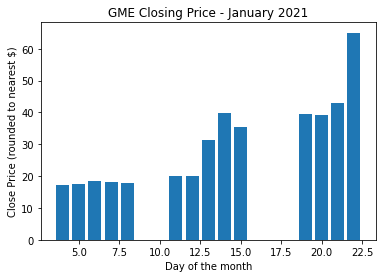

In [ ]:
plt.bar(x1, y1)
plt.xlabel('Day of the month')
plt.ylabel('Close Price (rounded to nearest $)')
plt.title('GME Closing Price - January 2021')
plt.show

## Number of GME mentions in WSB (Bar Graph)

<function matplotlib.pyplot.show>

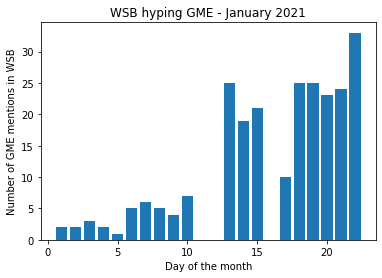

In [ ]:
plt.bar(x2, y2)
plt.xlabel('Day of the month')
plt.ylabel('Number of GME mentions in WSB')
plt.title('WSB hyping GME - January 2021')
plt.show

# Conclusion: More mentions == more money activity! 🚀🚀🚀🚀

In [ ]:
import seaborn as sns

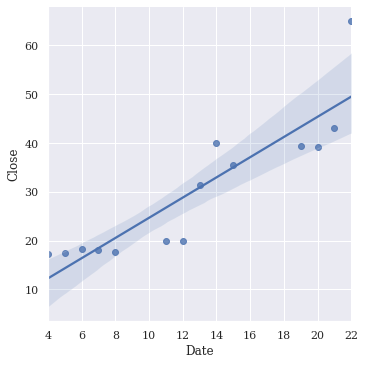

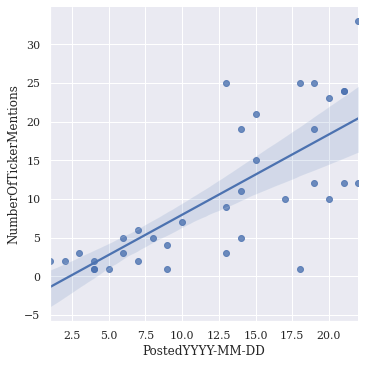

In [ ]:
sns.set(font='serif')
# sns.relplot(x='Date', y='Close', hue='Close', data=gme)
sns.lmplot(x='Date', y='Close', data=gme)
sns.lmplot(x='PostedYYYY-MM-DD', y='NumberOfTickerMentions', data=comments)

## Hold on... Does more mentions actually correlate with more money?
> On Jan 9th, we can see the blue line in the back being higher than Jan 8th or 10th, but the color lines in the front indicate that the 9th had more mentions than the 7th or 8th. I guess it doesn't always correlate! But that's the game with stocks. You just never know what can happen! 

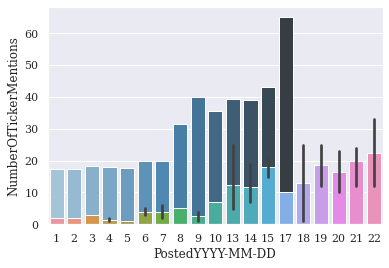

In [ ]:
sns.barplot(x='Date', y='Close', data=gme, palette='Blues_d')
sns.barplot(x='PostedYYYY-MM-DD', y='NumberOfTickerMentions', data=comments)

## Extra fun: Word Cloud of the WSB comments!

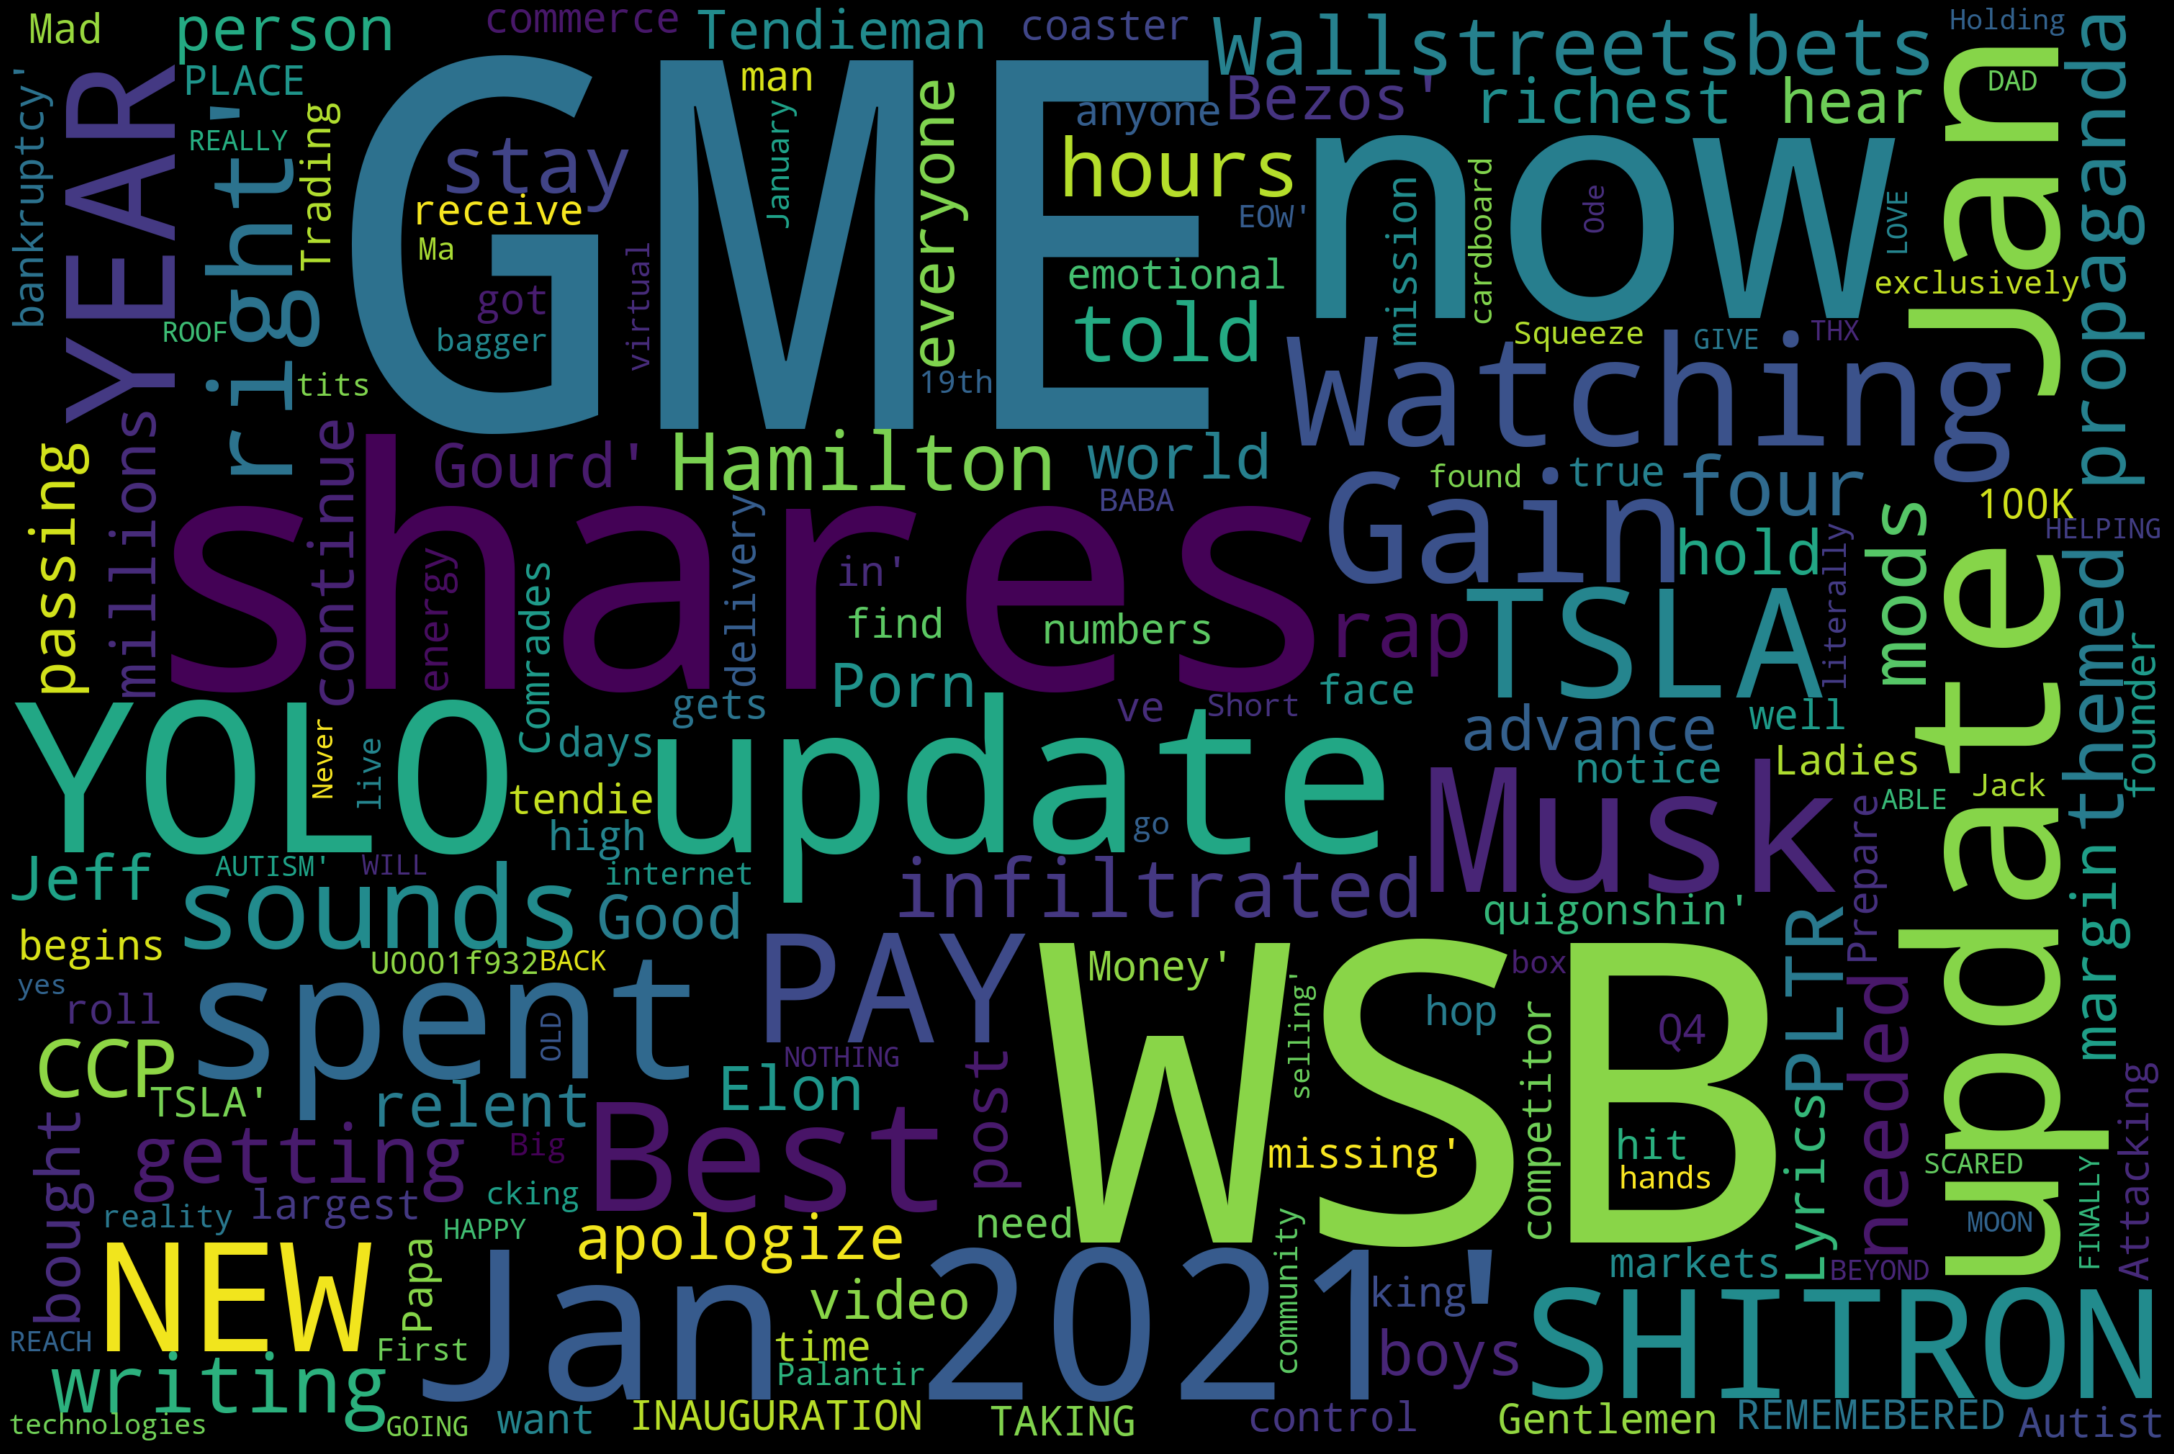

In [ ]:
# source : https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/
text = comments.Title.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()